In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, GRU
from numpy import array
plt.rcParams['figure.figsize'] = [20, 8]

In [20]:
df = pd.read_csv('../Dataset/Platinum.csv')
df = df.sort_index(ascending=False)
df

,Date,Open,Close,High,Low
1694,3/1/2019,871.0,860.0,874.5,857.5
1693,3/3/2019,860.0,860.5,860.5,860.0
1692,3/4/2019,863.0,836.5,864.0,835.0
1691,3/5/2019,836.5,837.0,840.5,833.0
1690,3/6/2019,836.0,827.0,837.5,825.0
...,...,...,...,...,...
4,3/22/2024,909.0,897.5,913.0,896.0
3,3/23/2024,897.5,897.5,897.5,897.5
2,3/24/2024,0.0,898.0,899.0,0.0
1,3/25/2024,898.5,904.5,913.5,898.5


In [21]:
df['Close'].isnull().sum()

0

In [22]:
df = df.reset_index()['Close']

In [23]:
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df).reshape(-1,1))

In [24]:
train_size = int(0.6 * len(df1))
test_size = len(df1) - train_size

train_data = df1[:train_size]
test_data = df1[train_size:]

In [25]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]  
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [26]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [27]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [28]:
model = Sequential()
model.add(GRU(64, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [29]:
model.fit(X_train, y_train, validation_data = (X_test, ytest), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
15/15 [==============================] - 6s 162ms/step - loss: 0.1264 - val_loss: 0.0098
Epoch 2/100
15/15 [==============================] - 1s 100ms/step - loss: 0.0159 - val_loss: 0.0018
Epoch 3/100
15/15 [==============================] - 2s 114ms/step - loss: 0.0067 - val_loss: 0.0015
Epoch 4/100
15/15 [==============================] - 1s 96ms/step - loss: 0.0044 - val_loss: 0.0022
Epoch 5/100
15/15 [==============================] - 2s 104ms/step - loss: 0.0036 - val_loss: 0.0013
Epoch 6/100
15/15 [==============================] - 1s 99ms/step - loss: 0.0029 - val_loss: 0.0011
Epoch 7/100
15/15 [==============================] - 2s 108ms/step - loss: 0.0022 - val_loss: 9.3611e-04
Epoch 8/100
15/15 [==============================] - 2s 108ms/step - loss: 0.0016 - val_loss: 7.8942e-04
Epoch 9/100
15/15 [==============================] - 2s 106ms/step - loss: 0.0013 - val_loss: 6.9628e-04
Epoch 10/100
15/15 [==============================] - 1s 91ms/step - loss: 0.0012

In [30]:
train_predict = model.predict(X_train)
y_pred = model.predict(X_test)

19/19 [==============================] - 1s 24ms/step


In [31]:
train_predict = scaler.inverse_transform(train_predict)
y_pred = scaler.inverse_transform(y_pred)

In [32]:
train_size1 = int(0.6 * len(df))
test_size1 = len(df) - train_size

train_data1 = df[:train_size]
test_data1 = df[train_size:]

x_test1 = np.array(test_data1.index).reshape(-1, 1)
y_test1 = np.array(test_data1)

In [33]:
#RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test1)**2))
print('Testing RMSE:', test_rmse)

#MSE
test_mse = np.mean((y_pred - y_test1)**2)
print('Testing MSE:', test_mse)

#MAPE
test_mape = np.mean(np.abs((y_test1 - y_pred) / y_test1)) * 100
print('Testing MAPE:', test_mape)

#MAE
test_mae = np.mean(np.abs(y_pred - y_test1))
print('Testing MAE:', test_mae)

Testing RMSE: 85.14310556707265
Testing MSE: 7249.348425605678
Testing MAPE: 7.056273854075265
Testing MAE: 67.43976305746885


In [34]:
lst_output=[]
n_steps=100
i=0

x_input = test_data[len(test_data) - n_steps:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()


while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


[0.43406323]
101
1 day input [0.4978903  0.4978903  0.4978903  0.50070323 0.51687764 0.5281294
 0.52461322 0.54008439 0.54008439 0.54008439 0.54008439 0.54078762
 0.56891702 0.58087201 0.56329114 0.5583685  0.5625879  0.55274262
 0.53938115 0.51054852 0.52180028 0.52180028 0.51969058 0.5
 0.47960619 0.46132208 0.44725738 0.44233474 0.44233474 0.44936709
 0.45147679 0.42827004 0.40787623 0.4395218  0.43248945 0.43248945
 0.43248945 0.42616034 0.42967651 0.44303797 0.41420534 0.4535865
 0.4535865  0.4535865  0.47327707 0.46483826 0.46624473 0.45218003
 0.42264416 0.42264416 0.42264416 0.42686357 0.43811533 0.40436006
 0.41420534 0.395218   0.395218   0.39170183 0.41842475 0.3931083
 0.41912799 0.42967651 0.4416315  0.4416315  0.4416315  0.43319269
 0.44374121 0.40857947 0.43108298 0.43319269 0.43319269 0.39662447
 0.41912799 0.40225035 0.40084388 0.41279887 0.40646976 0.42967651
 0.40576653 0.44514768 0.45780591 0.44585091 0.45007032 0.4838256
 0.46413502 0.48945148 0.46835443 0.48452883

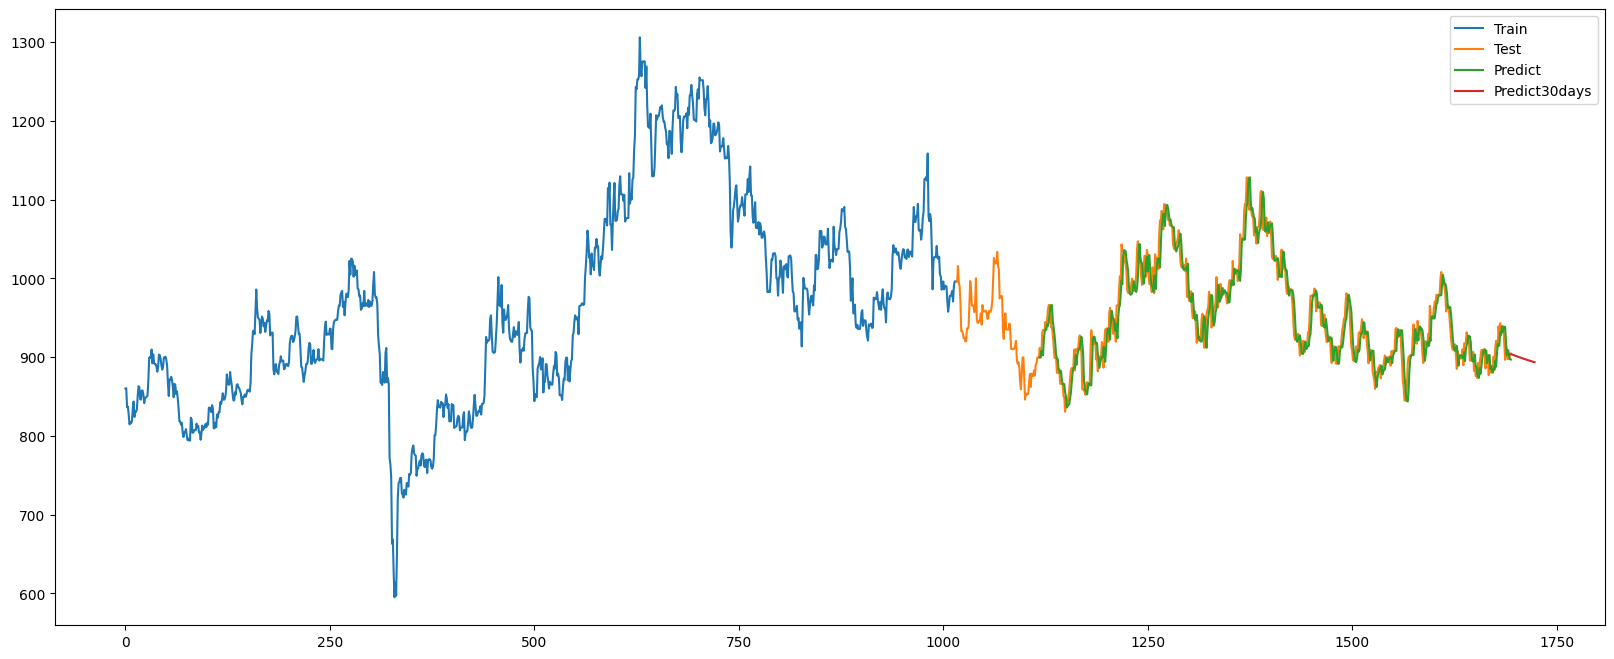

<Figure size 2000x800 with 0 Axes>

In [35]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))

test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))

test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))

prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))

plt.legend(['Train','Test','Predict','Predict30days'])
plt.figure()
plt.show()